In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

000001.jpg
(1687.0, 2540.0, 918.0, 591.0)
(1422.0, 2784.0, 230.0, 168.0)
(1687.0, 2540.0, 918.0, 591.0)
(791.0, 1570.0, 145.0, 141.0)
(1102.0, 1475.0, 200.0, 161.0)
(3506.0, 1558.0, 212.0, 137.0)
(624.0, 1484.0, 97.0, 102.0)
(3202.0, 713.0, 358.0, 258.0)


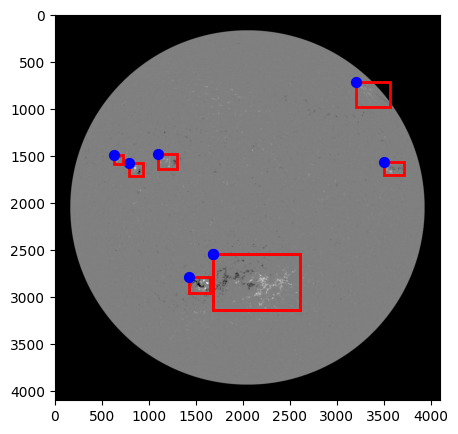

000002.jpg
(657.0, 1443.0, 184.0, 149.0)
(841.0, 1576.0, 130.0, 135.0)
(1449.0, 2777.0, 251.0, 183.0)
(1677.0, 2519.0, 976.0, 621.0)
(1190.0, 1483.0, 177.0, 150.0)
(3541.0, 1563.0, 202.0, 136.0)
(3213.0, 710.0, 319.0, 222.0)


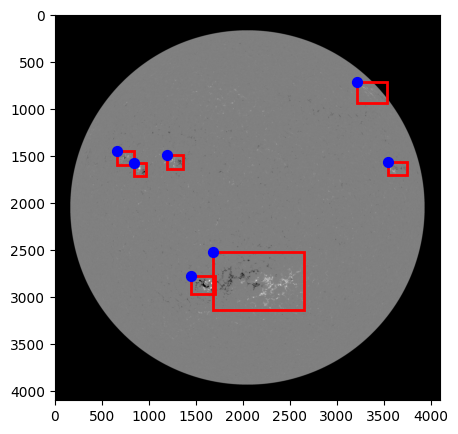

000003.jpg
(713.0, 1475.0, 166.0, 109.0)
(900.0, 1576.0, 135.0, 143.0)
(1241.0, 1487.0, 192.0, 138.0)
(1503.0, 2762.0, 273.0, 205.0)
(1749.0, 2522.0, 973.0, 589.0)


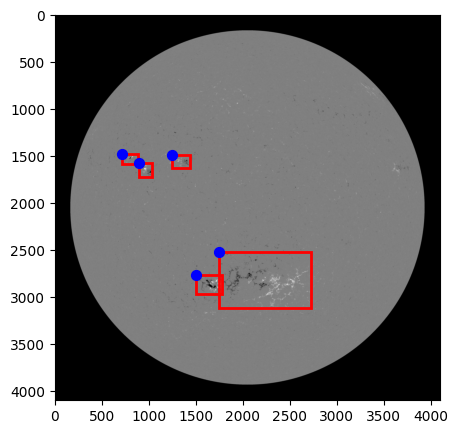

In [35]:
label_file = open('../data/AR-MOT/labels.csv', 'r', encoding='utf-8')
label_file.readline()
for file in sorted(os.listdir('../data/AR-MOT/images'))[:3]:
    print(file)
    image = plt.imread('../data/AR-MOT/images/' + file)
    
    index = int(file[:-4])
    bboxes = []
    while line.startswith(str(index) + ','):
        _, x, y, width, height= map(float, line.split(','))
        bboxes.append((x, y, width, height))
        line = label_file.readline()
        
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray')

    for bbox in bboxes:
        x, y, w, h = bbox
        print(bbox)
        plt.gca().add_patch(plt.Rectangle((x,y), w, h, edgecolor='red', facecolor='none', linewidth=2))
        plt.scatter(x, y, color='blue', s=50)

    plt.show()

In [31]:
with open('../data/AR-MOT/labels.csv', 'w', encoding='utf-8') as labels:
    labels.write('ix,x1,y1,w,h\n')
    with open('../data/AR-MOT/ARgt.txt', 'r', encoding='utf-8') as prev_labels:
        for line in prev_labels.readlines():
            ix, _, x, y, width, height, _ = line.split(',')
            labels.write(f'{ix},{x},{int(y)-int(height)},{width},{height}\n')